<div style="text-align: center;"><div  style="color:#7f0000; font-size:30px; font-weight:bold; line-height:40px;">Multiple  Linear Regression (House Price Prediction)</div></div>
<div style="text-align: center; color:#006666"><strong>Owner: </strong>Rishikesh Surve</div>
<div style="text-align: center; color:#006666"><strong>Mail ID: </strong>rishisurve04@gmail.com</div>
<div style="text-align: center; color:#006666"><strong>Linkedin ID: </strong>linkedin.com/in/rishikesh-surve-6336b615b</div>


## <span style="color:#01A7E5">**Data Description**</span>
1. CRIM - per capita crime rate by town
2. ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS - proportion of non-retail business acres per town.
4. CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5. NOX - nitric oxides concentration (parts per 10 million)
6. RM - average number of rooms per dwelling
7. AGE - proportion of owner-occupied units built prior to 1940
8. DIS - weighted distances to five Boston employment centres
9. RAD - index of accessibility to radial highways
10. TAX - full-value property-tax rate per dollar 10,000
11. PTRATIO - pupil-teacher ratio by town
12. B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT - Percentage lower status of the population
14. MEDV - Median value of owner-occupied homes in dollar 1000's



## <span style="color:#01A7E5">**Process**</span>

1. Reading the raw file <br>
2. Removing unwanted columns <br>
3. Univariate Analysis for deeper look in each parameter <br>
4. Bi Variate Analysis  for looking into linearity <br>
5. Multi Variate Analysis for selecting relevant features <br>


## <span style="color:#01A7E5">**Modelling**</span>

1. Modelling using linear regression <br>
2. Modelling using linear Polynomial regression <br>
3. Selecting and tuning model to get better results <br>
4. Error evalutions <br>

### Loading All required packages

In [1]:
import pandas as pd
import os as os
import numpy as np

#Visuals
import matplotlib.pyplot as plt
import seaborn as sns

# To split data
from sklearn.model_selection import train_test_split

# Models
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Evalution 
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import zscore

import warnings
warnings.filterwarnings("ignore")

### User Defined functions

In [2]:
def scatter_regplot(x, y, in_data): 
    '''
    Returns Scatter plot with regression trend line
    '''
    
    sns.regplot(x=x, y=y, data=in_data) 
    plt.xlabel(x, fontsize = 13)
    plt.ylabel(y, fontsize = 13)
    plt.title("Scatter Plot of " + x + " & " + y, fontsize = 15)
    plt.grid()
    plt.show()

In [3]:
def all_error_metric(actual, predicted):
    '''
    returns important error metrics (You can add more like MAE, MAPE ..)
    '''
    
    mse = mean_squared_error(actual,predicted)    # to be only of test data (how much is the score in surprise test?)
    rmse = np.sqrt(mse).round(2)
    rsq = r2_score(actual,predicted).round(2)
    print ("RMSE: ", rmse)
    print ("R sq: ", rsq)

### Load Required files

In [4]:
filepath = r"C:\Users\Rishi\OneDrive\Python Basics 03.28.2020\Data"
filename = "Boston.csv"

data = pd.read_csv(os.path.join(filepath, filename))
print(data)

     Unnamed: 0     crim    zn  indus  chas    nox     rm   age     dis  rad  \
0             1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1             2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2             3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3             4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4             5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   
..          ...      ...   ...    ...   ...    ...    ...   ...     ...  ...   
501         502  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1   
502         503  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1   
503         504  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1   
504         505  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1   
505         506  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1   

     tax  ptratio   black  lstat  medv 

In [5]:
data.head(5)  # Top 5 rows

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
data.tail(5)  # bottom 5 rows

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,506,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [7]:
data.shape

(506, 15)

In [8]:
data.columns

Index(['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

### <font color='red'> Remove Unwanted columns </font>

In [9]:
data = data.drop(["Unnamed: 0"], axis = 1)
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### Check for missing Data

In [10]:
data.isnull().sum() # Missing values

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

### <font color='green'>Lucky !! No missing data :) </font>

### <font color='blue'>Lets take Prices first - as that is our output variable </font>

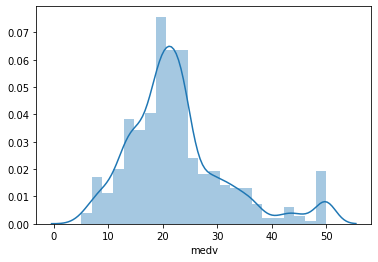

In [11]:
sns.distplot(data["medv"])

### <font color='green'>Normal !! with some outliers :) </font>

### Univariate Analysis

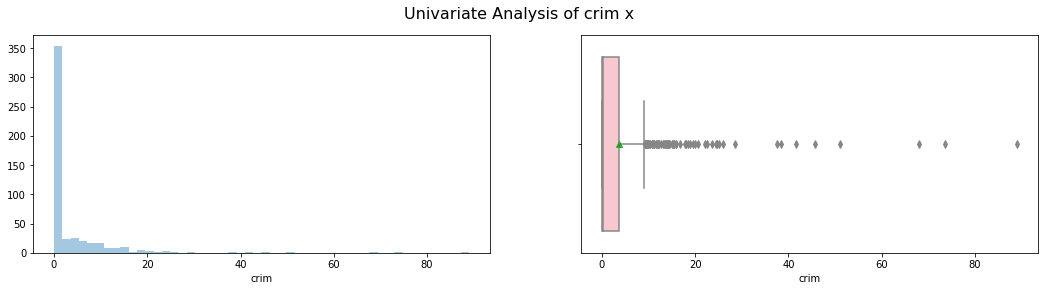

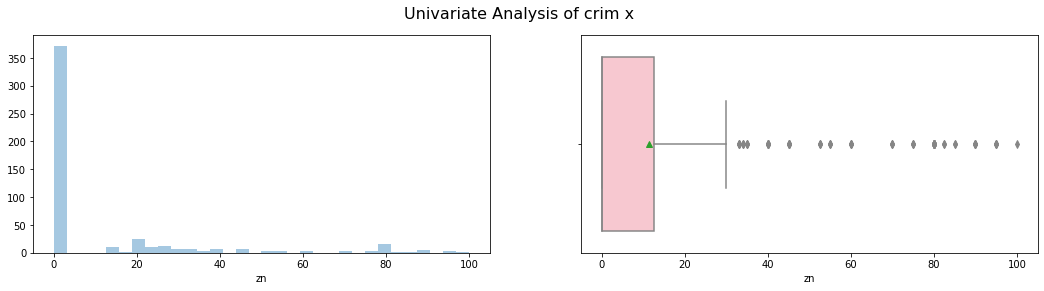

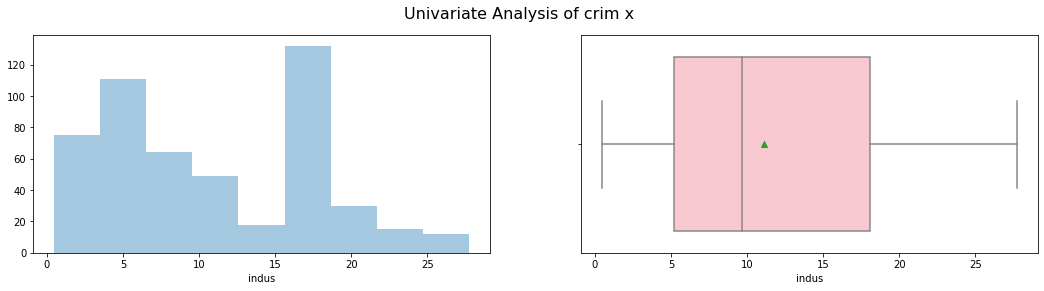

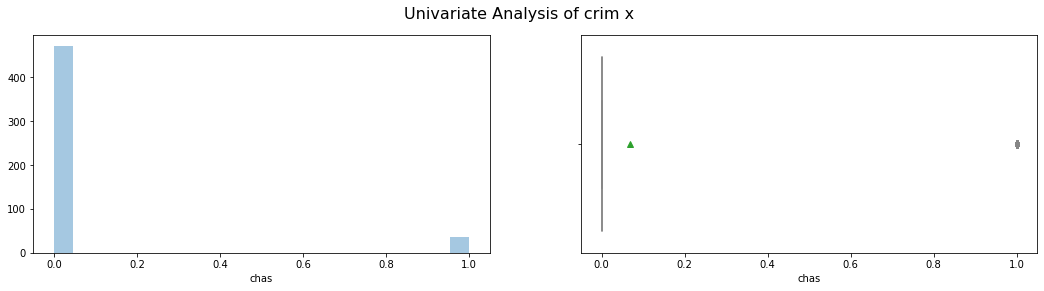

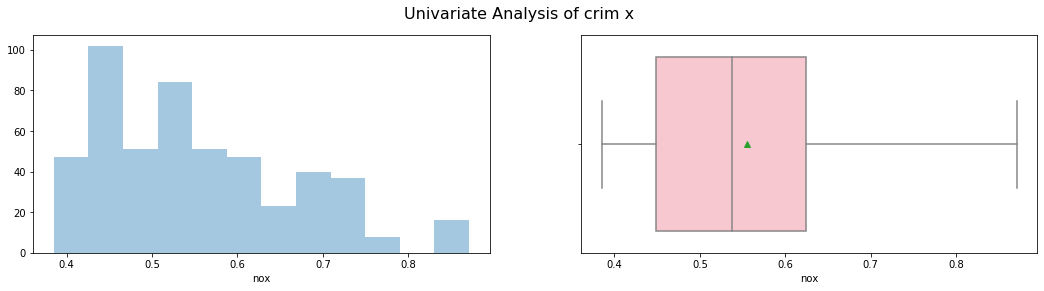

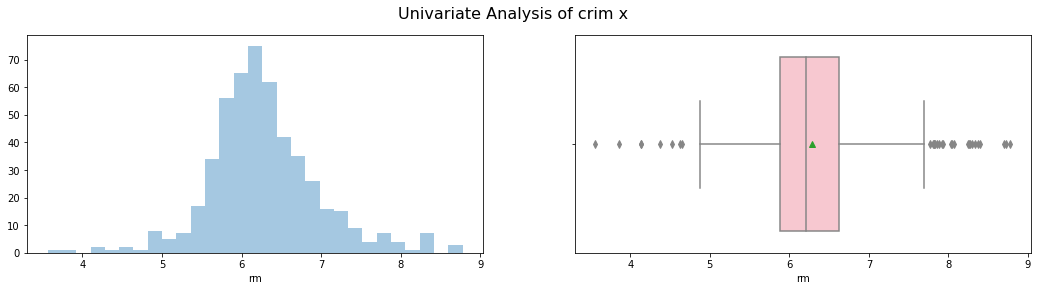

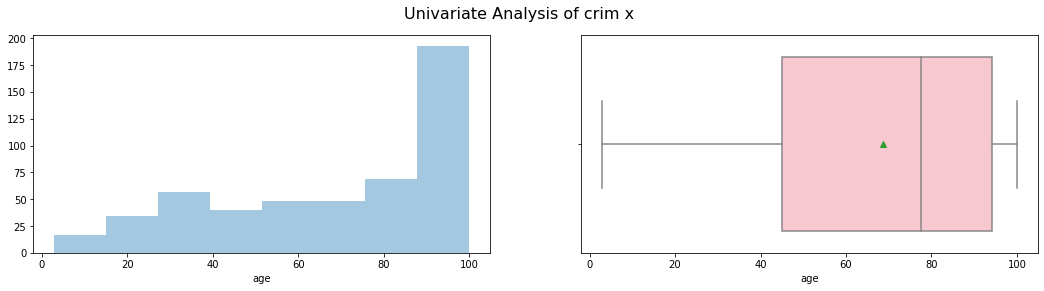

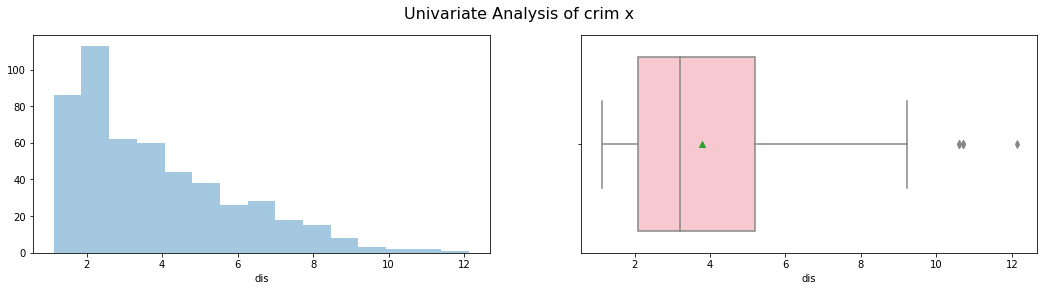

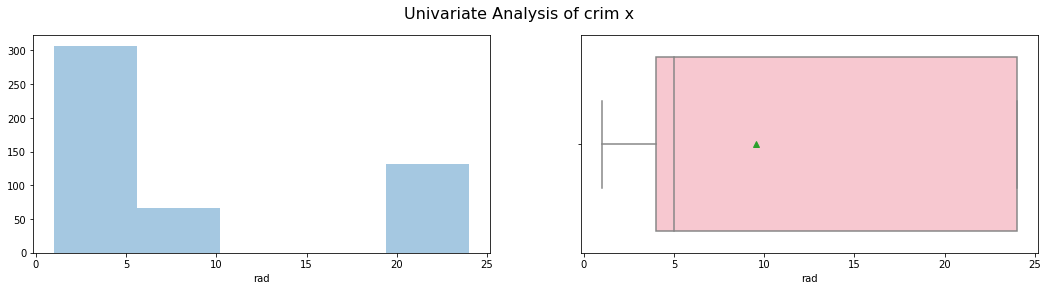

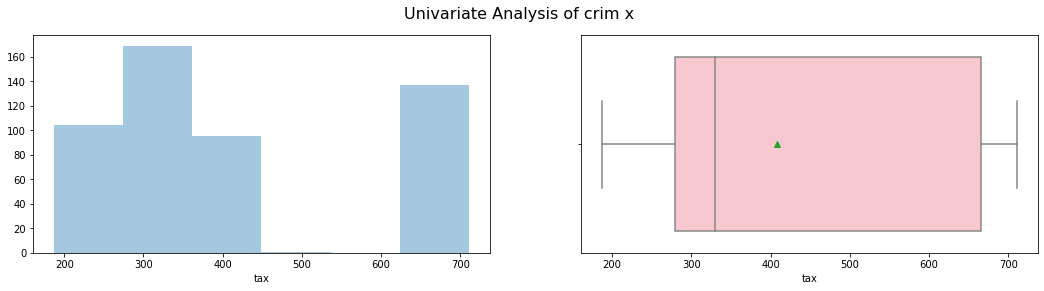

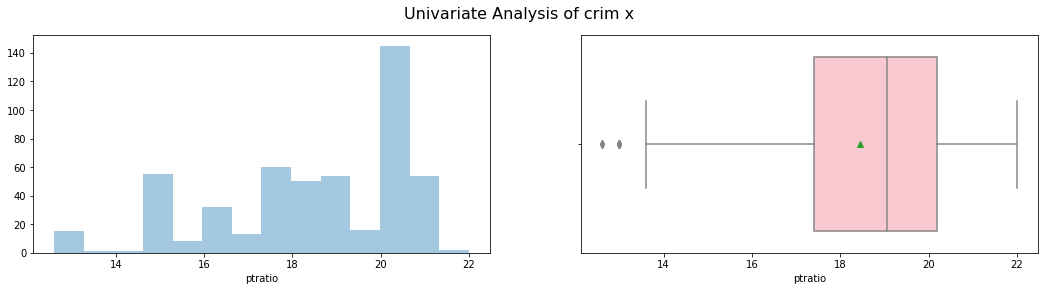

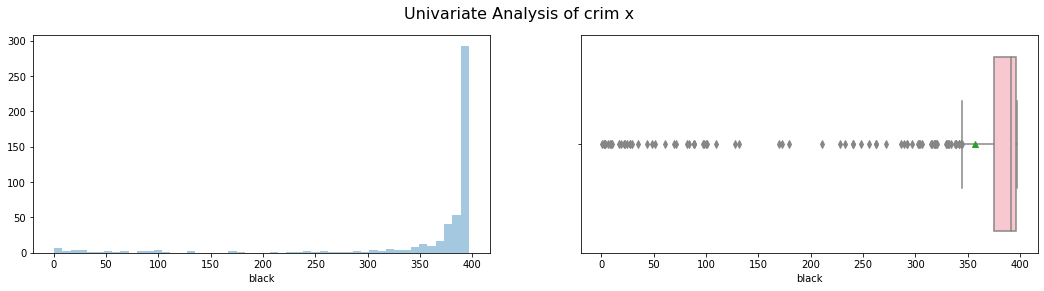

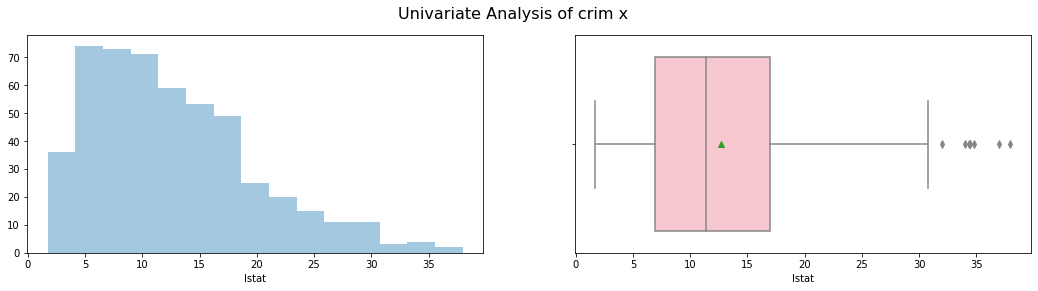

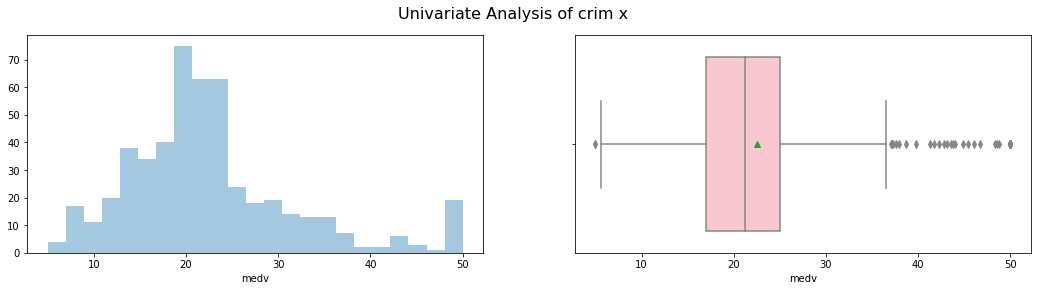

In [12]:
x_axis = data.columns.tolist() # List

for x in x_axis:
    fig, axes = plt.subplots(1, 2, figsize=(18,4))
    sns.distplot(data[x], ax=axes[0], kde = False)
    sns.boxplot(data[x], ax=axes[1], orient = "h", showmeans = True, color = "pink")
    fig.suptitle('Univariate Analysis of crim ' + "x", fontsize=16)

### Bi variate analysis

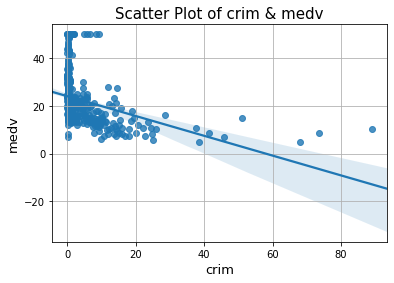

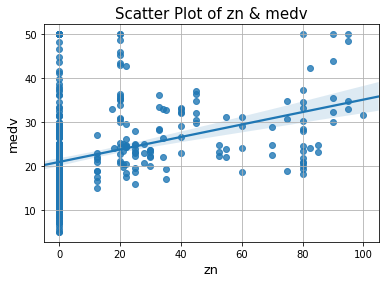

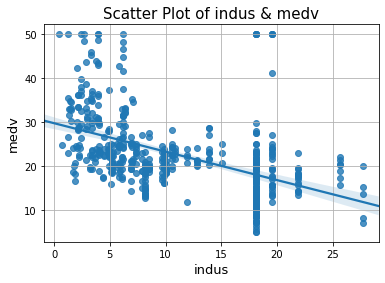

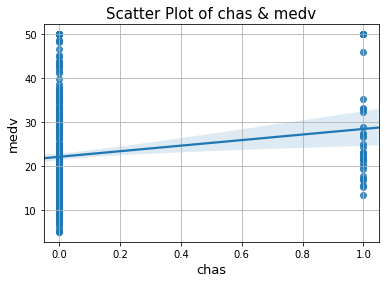

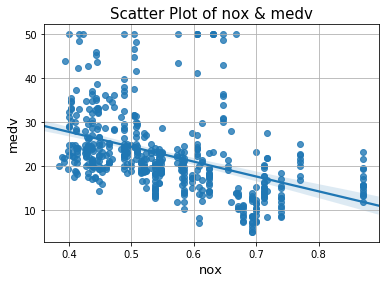

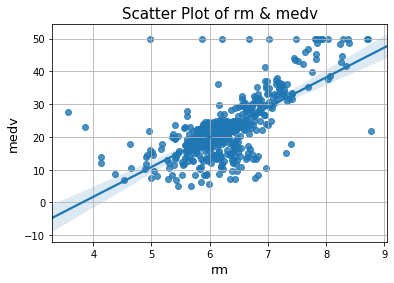

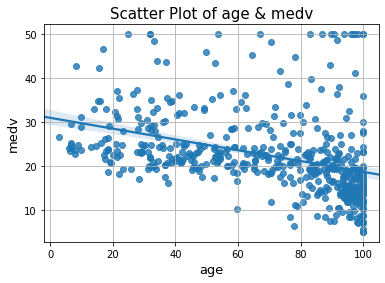

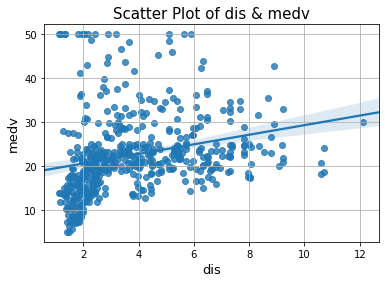

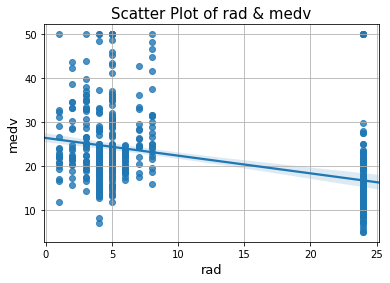

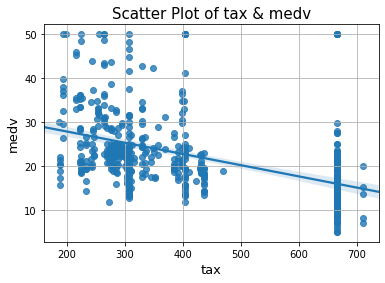

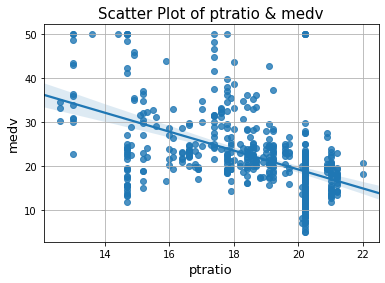

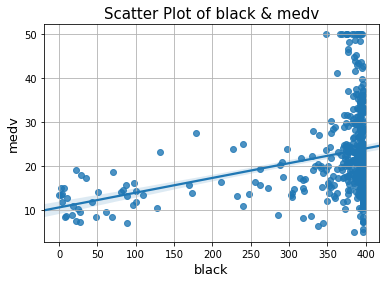

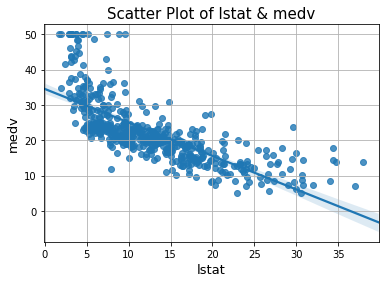

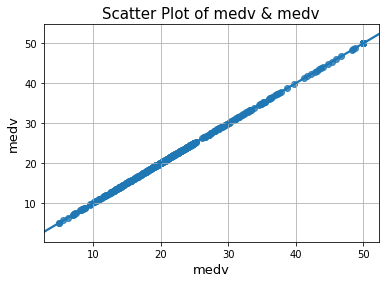

In [13]:
x_axis = data.columns.tolist()
y_axis = 'medv'

for col in x_axis:
    scatter_regplot(x = col, y = y_axis, in_data = data) # User defined function

### <font color='green'>Linearity !! Looks like LSTAT, RM, PTRATIO have some linearity with Price </font>

### <font color='blue'> Correlation in heatmap?</font>

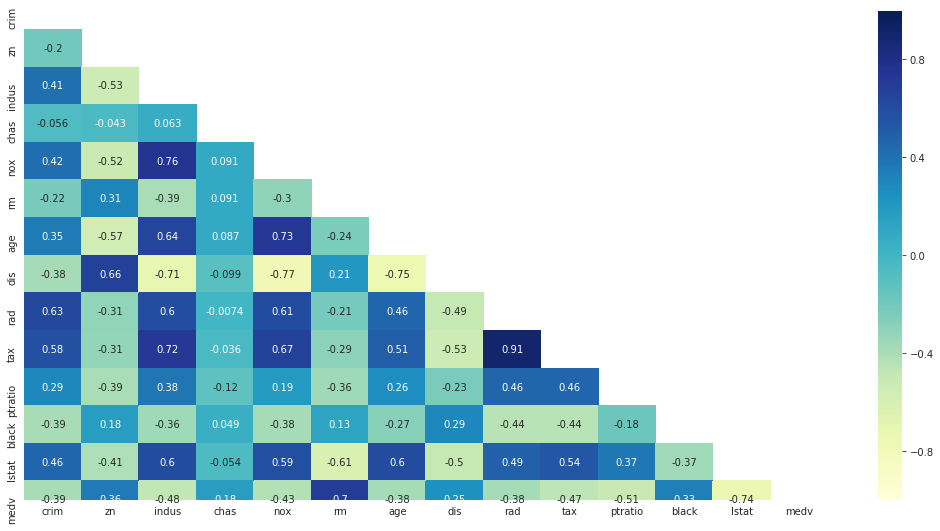

In [14]:
num_corr = data.corr()

mask = np.zeros_like(num_corr)

mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(18, 9))
    ax = sns.heatmap(num_corr , mask=mask, vmin = -1,vmax=1, annot = True, cmap="YlGnBu")

### <font color='green'>Linearity seems True !! Looks like LSTAT & RM have some linearity with Price </font>

<html>
<body>
<u><h1 style="text-align:center; color:brown; font-size:30px;">Model 1: OLS with All features</h1></u>
</body>
</html>

In [15]:
data.drop("medv", axis = 1).columns     # All features for model 1

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat'],
      dtype='object')

In [16]:
X = data.drop("medv", axis = 1)   # Input data  (All features Medv is y so dropping in X)
y = data[["medv"]]             # Output data

In [17]:
# Split the data for train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y , train_size = 0.8 , random_state = 21) # 80-20 Split


In [18]:
X_train_1 = sm.add_constant(X_train)    # Adds Intercept 

lm = sm.OLS(y_train, X_train_1)       # Creates function
lm = lm.fit()                      # Get best fit line output

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     87.96
Date:                Thu, 06 May 2021   Prob (F-statistic):          3.39e-107
Time:                        11:54:30   Log-Likelihood:                -1186.7
No. Observations:                 404   AIC:                             2401.
Df Residuals:                     390   BIC:                             2458.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.6532      5.605      7.253      0.000      29.633      51.673
crim          -0.0877      0.043     -2.057      0.040      -0.172      -0.004
zn             0.0488      0.016      3.114      0.002       0.018       0.080
indus          0.0195      0.065      0.299      0.765      -0.109       0.148
chas           3.0631      0.888      3.451      0.001       1.318       4.808
nox          -18.4821      4.141     -4.463      0.000     -26.624     -10.341
rm             3.3470      0.449      7.453      0.000       2.464       4.230
age            0.0032      0.015      0.221      0.825      -0.025       0.032
dis           -1.4257      0.218     -6.538      0.000      -1.854      -0.997
rad            0.3252      0.072      4.541      0.000       0.184       0.466
tax           -0.0120      0.004     -3.030      0.003      -0.020      -0.004
ptratio       -1.0558      0.147     -7.173      0.000      -1.345      -0.766
black          0.0108      0.003      3.610      0.000       0.005       0.017
lstat         -0.5384      0.055     -9.794      0.000      -0.646      -0.430
==============================================================================
Omnibus:                      118.140   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              434.885
Skew:                           1.270   Prob(JB):                     3.68e-95
Kurtosis:                       7.403   Cond. No.                     1.52e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
pvalue = 0.837
if (pvalue <= 0.05):
    print("Reject Ho: Relation")
else:
    print("Accept Ho: No Relation")

Accept Ho: No Relation


### <font color='orange'> Well we used all features without checking for any linearity. Looking at confidence interval & p-values "Indus" & "Age" doesnt make any sense for our model 1</font>

<html>
<body>
<u><h1 style="text-align:center; color:brown; font-size:30px;">Model 2: OLS dropping waste columns (indus, age)</h1></u>
</body>
</html>

In [20]:
X = data.drop(["medv", "indus", "age"], axis = 1)  # Drop unwanted columns in X (Medv is y so dropping in X)
y = data[["medv"]]             # Output data

In [21]:
# Split the data for train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y , train_size = 0.8, random_state = 21)   # Should be same as earlier case

X_train_1 = sm.add_constant(X_train)    # Adds Intercept 

lm = sm.OLS(y_train, X_train_1)       # Creates function
lm = lm.fit()                      # Get best fit line output

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     104.4
Date:                Thu, 06 May 2021   Prob (F-statistic):          3.47e-109
Time:                        11:54:30   Log-Likelihood:                -1186.8
No. Observations:                 404   AIC:                             2398.
Df Residuals:                     392   BIC:                             2446.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.4210      5.555      7.277      0.000      29.501      51.341
crim          -0.0885      0.042     -2.085      0.038      -0.172      -0.005
zn             0.0481      0.015      3.110      0.002       0.018       0.078
chas           3.0967      0.881      3.516      0.000       1.365       4.828
nox          -17.8952      3.817     -4.688      0.000     -25.400     -10.390
rm             3.3599      0.435      7.724      0.000       2.505       4.215
dis           -1.4558      0.201     -7.226      0.000      -1.852      -1.060
rad            0.3184      0.069      4.625      0.000       0.183       0.454
tax           -0.0115      0.004     -3.185      0.002      -0.019      -0.004
ptratio       -1.0470      0.145     -7.228      0.000      -1.332      -0.762
black          0.0108      0.003      3.640      0.000       0.005       0.017
lstat         -0.5327      0.051    -10.380      0.000      -0.634      -0.432
==============================================================================
Omnibus:                      119.570   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              446.450
Skew:                           1.281   Prob(JB):                     1.13e-97
Kurtosis:                       7.467   Cond. No.                     1.48e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### <font color='orange'> Hmmm.... looks okay.. but do we need all (11) features? can we get nearly same accuracy using few relevant features? Lets use Linearity assumption now ! </font>

<html>
<body>
<u><h1 style="text-align:center; color:brown; font-size:30px;">Model 3: OLS with LSTAT only</h1></u>
</body>
</html>

In [22]:
X = data[["lstat"]]   # Input data 
y = data[["medv"]]             # Output data

# Split the data for train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 21)   # 70-30 Split

X_train_1 = sm.add_constant(X_train)    # Adds Intercept 

lm = sm.OLS(y_train, X_train_1)       # Creates function
lm = lm.fit()                      # Get best fit line output

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     489.6
Date:                Thu, 06 May 2021   Prob (F-statistic):           1.55e-71
Time:                        11:54:31   Log-Likelihood:                -1302.4
No. Observations:                 404   AIC:                             2609.
Df Residuals:                     402   BIC:                             2617.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5680      0.621     55.706      0.000      33.348      35.788
lstat         -0.9407      0.043    -22.128      0.000      -1.024      -0.857
==============================================================================
Omnibus:                      106.597   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              216.858
Skew:                           1.409   Prob(JB):                     8.12e-48
Kurtosis:                       5.224   Cond. No.                         30.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

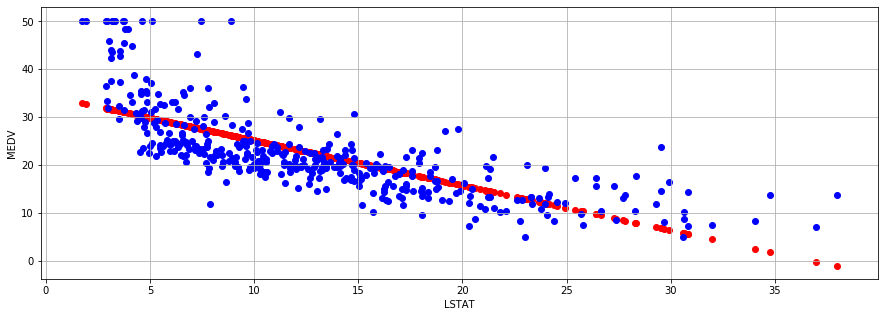

In [23]:
plt.figure(figsize = (15,5))
plt.scatter(X_train["lstat"], lm.predict(X_train_1),  color='red')  # beacuse it have only  Train data - Regression line (eq can also be used)
plt.scatter(X_train["lstat"], y_train,  color='blue')
plt.xlabel("LSTAT")
plt.ylabel("MEDV")
#plt.scatter(X_test, lm.predict(X_test_1),  color='black')    # y_pred = lm.predict(test)  -- Test  data 
plt.grid()
plt.show()

### <font color='orange'> Wooo !!! LSTAT alone can give us approx 55% accuracy.. Lets take second linear feature (RM). LSTAT & RM collinearity looks okay (0.6 - Not very high) </font>

<html>
<body>
<u><h1 style="text-align:center; color:brown; font-size:30px;">Model 4: OLS with LSTAT & RM only</h1></u>
</body>
</html>

In [24]:
X = data[["lstat", "rm"]]   # Input data  
y = data[["medv"]]             # Output data

# Split the data for train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y , train_size = 0.8, random_state = 21)   # 70-30 Split

X_train_1 = sm.add_constant(X_train)    # Adds Intercept 

lm = sm.OLS(y_train, X_train_1)       # Creates function
lm = lm.fit()                      # Get best fit line output

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     346.2
Date:                Thu, 06 May 2021   Prob (F-statistic):           4.55e-88
Time:                        11:54:31   Log-Likelihood:                -1260.7
No. Observations:                 404   AIC:                             2527.
Df Residuals:                     401   BIC:                             2539.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5738      3.486      0.451      0.652      -5.280       8.428
lstat         -0.6515      0.049    -13.346      0.000      -0.748      -0.556
rm             4.6682      0.487      9.589      0.000       3.711       5.625
==============================================================================
Omnibus:                      107.354   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              297.752
Skew:                           1.255   Prob(JB):                     2.21e-65
Kurtosis:                       6.374   Cond. No.                         200.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### <font color='orange'> Thats approx 63% accuracy..</font>

<html>
<body>
<u><h1 style="text-align:center; color:Red; font-size:30px;">Model 5: OLS with LSTAT and LSTAT polynomial features </h1></u>
</body>
</html>

In [25]:
# Error Distribution

In [26]:
from sklearn.preprocessing import PolynomialFeatures

In [27]:
X = data[["lstat"]]   # Input data  
y = data[["medv"]]             # Output data

# Split the data for train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y , train_size = 0.8, random_state = 21)   # 70-30 Split

#transforms the existing features to higher degree features
polynomial_features = PolynomialFeatures(degree = 2)
X_train_poly = polynomial_features.fit_transform(X_train)

In [28]:
#fit the transformed features to linear regression
poly_model = sm.OLS(y_train, X_train_poly) #creates function
poly_model = poly_model.fit()    #get best fit line output

poly_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     364.4
Date:                Thu, 06 May 2021   Prob (F-statistic):           6.33e-91
Time:                        11:54:31   Log-Likelihood:                -1254.1
No. Observations:                 404   AIC:                             2514.
Df Residuals:                     401   BIC:                             2526.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.7576      0.961     44.512      0.000      40.869      44.646
x1            -2.2990      0.136    -16.926      0.000      -2.566      -2.032
x2             0.0428      0.004     10.411      0.000       0.035       0.051
==============================================================================
Omnibus:                       75.737   Durbin-Watson:                   2.103
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.375
Skew:                           1.042   Prob(JB):                     2.00e-31
Kurtosis:                       5.013   Cond. No.                     1.14e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
X_test_poly = polynomial_features.fit_transform(X_test)  #adding degress data

#calculate R square value
rsq = r2_score(y_test["medv"], poly_model.predict(X_test_poly))  #on test data(In summary output its on train data)
print("R square:", round(rsq, 3))

R square: 0.624


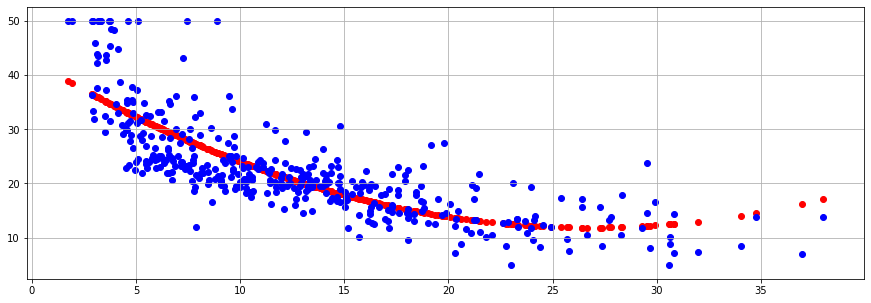

In [30]:
plt.figure(figsize = (15,5))
plt.scatter(X_train["lstat"], poly_model.predict(X_train_poly),  color='red')  # beacuse it have only  Train data - Regression line (eq can also be used)
plt.scatter(X_train["lstat"], y_train,  color='blue') 
plt.grid()
plt.show()

<html>
<body>
<u><h1 style="text-align:center; color:Red; font-size:30px;">Model 6: OLS with LSTAT, RM & LSTAT, RM polynomial features </h1></u>
</body>
</html>

In [31]:
X = data[["lstat", "rm"]]   # Input data  
y = data[["medv"]]             # Output data

# Split the data for train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y , train_size = 0.8, random_state = 21)   # 70-30 Split

#transforms the existing features to higher degree features
polynomial_features = PolynomialFeatures(degree = 2)
X_train_poly = polynomial_features.fit_transform(X_train)

#fit the transformed features to linear regression
poly_model = sm.OLS(y_train, X_train_poly) #creates function
poly_model = poly_model.fit()    #get best fit line output

poly_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     237.7
Date:                Thu, 06 May 2021   Prob (F-statistic):          4.16e-117
Time:                        11:54:31   Log-Likelihood:                -1184.0
No. Observations:                 404   AIC:                             2380.
Df Residuals:                     398   BIC:                             2404.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         69.4200     16.331      4.251      0.000      37.315     101.525
x1            -0.1715      0.563     -0.305      0.761      -1.277       0.934
x2           -16.7654      4.427     -3.787      0.000     -25.468      -8.063
x3             0.0130      0.006      2.310      0.021       0.002       0.024
x4            -0.1612      0.070     -2.297      0.022      -0.299      -0.023
x5             1.7587      0.307      5.732      0.000       1.156       2.362
==============================================================================
Omnibus:                      109.173   Durbin-Watson:                   2.153
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1206.345
Skew:                           0.794   Prob(JB):                    1.11e-262
Kurtosis:                      11.315   Cond. No.                     2.44e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.44e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
X_test_poly = polynomial_features.fit_transform(X_test)  #adding degress data

#calculate R square value
rsq = r2_score(y_test["medv"], poly_model.predict(X_test_poly))  #on test data(In summary output its on train data)
print("R square:", round(rsq, 3))

R square: 0.779


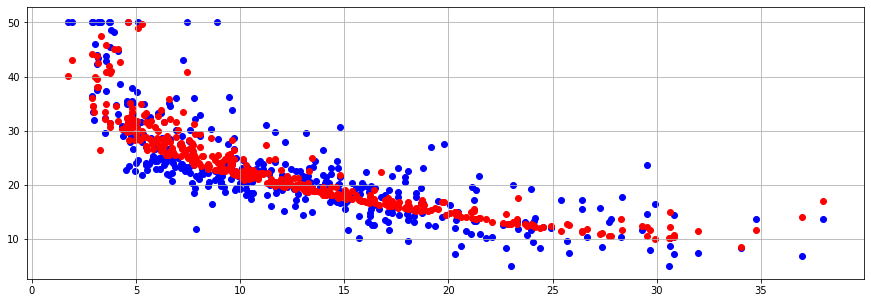

In [33]:
plt.figure(figsize = (15,5))
plt.scatter(X_train["lstat"], y_train,  color='blue')
plt.scatter(X_train["lstat"], poly_model.predict(X_train_poly),  color='red')  # beacuse it have only  Train data - Regression line (eq can also be used)
plt.grid()
plt.show()

<html>
<body>
<u><h1 style="text-align:center; color:Red; font-size:30px;"> Error Analysis on Model 6
</h1></u>
</body>
</html>

In [34]:
#best modelname poly_model --- Replace with which ever modelyou want to use for model analysis

errors_train = y_train["medv"] - poly_model.predict(X_train_poly)
errors_test = y_test["medv"] - poly_model.predict(X_test_poly)

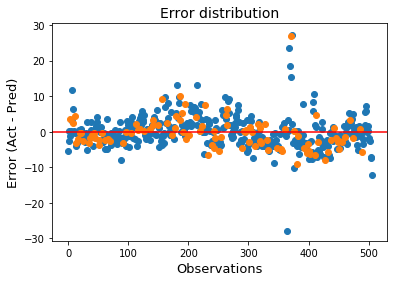

In [35]:
plt.scatter(y_train.index, errors_train)   # y_train.index & X_train.index is same
plt.scatter(y_test.index, errors_test)
plt.xlabel("Observations", fontsize = 13)
plt.ylabel("Error (Act - Pred)",  fontsize = 13)
plt.title("Error distribution",  fontsize = 14)
plt.axhline(0, color = "red")
plt.show()

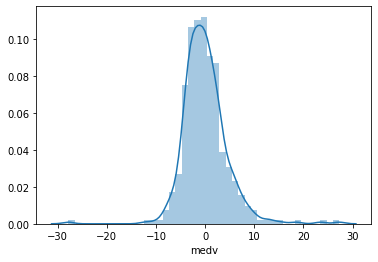

In [36]:
# Lets check error distribution 

sns.distplot(errors_train)
plt.show()

In [37]:
zscore(errors_train).min(), zscore(errors_train).max()

(-6.145583023413226, 6.017025554014634)

In [38]:
errors_train[errors_train < -20]

364   -27.864894
Name: medv, dtype: float64

In [39]:
data[data.index == 364][["lstat", "rm", "medv"]]  #using index to check row


,lstat,rm,medv
364,5.29,8.78,21.9


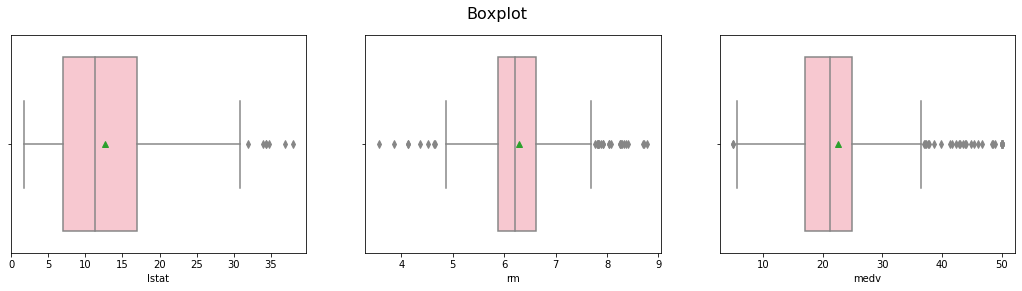

In [40]:
fig, axes = plt.subplots(1,3,figsize = (18,4))
sns.boxplot(data["lstat"], ax= axes[0], orient = "h", showmeans = True, color = "pink")
sns.boxplot(data["rm"], ax=axes[1], orient = "h", showmeans = True, color = "pink")
sns.boxplot(data["medv"], ax=axes[2], orient = "h", showmeans = True, color = "pink")
fig.suptitle("Boxplot", fontsize = 16)
plt.show()

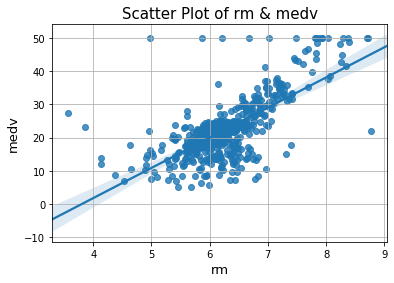

In [41]:
scatter_regplot(x = "rm", y = "medv", in_data = data)   # UDF

In [42]:
data_1 = data.copy()

#Replace RM outlier with median values of RM
data_1["rm"] = np.where((data_1["rm"] > 8) & (data_1["medv"]<30), data_1["rm"].median(), data_1["rm"])

In [43]:
data_1["rm"].median()

6.20825

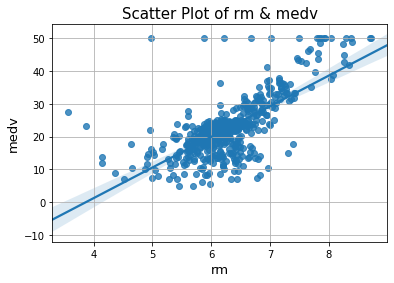

In [44]:
scatter_regplot(x = "rm", y = "medv", in_data = data_1)  #UDF

<html>
<body>
<u><h1 style="text-align:center; color:Red; font-size:30px;">Model 7: Model 6 - 1 high Outlier(Using Polynomial Package) </h1></u>
</body>
</html>

In [45]:
X = data_1[["lstat", "rm"]]   # Input data  
y = data_1[["medv"]]             # Output data

# Split the data for train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y , train_size = 0.8, random_state = 21)   # 70-30 Split

#transforms the existing features to higher degree features
polynomial_features = PolynomialFeatures(degree = 2)
X_train_poly = polynomial_features.fit_transform(X_train)

#fit the transformed features to linear regression
poly_model = sm.OLS(y_train, X_train_poly) #creates function
poly_model = poly_model.fit()    #get best fit line output

poly_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     274.1
Date:                Thu, 06 May 2021   Prob (F-statistic):          1.90e-126
Time:                        11:54:34   Log-Likelihood:                -1162.1
No. Observations:                 404   AIC:                             2336.
Df Residuals:                     398   BIC:                             2360.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         86.9397     15.686      5.543      0.000      56.103     117.776
x1            -0.1261      0.532     -0.237      0.813      -1.172       0.919
x2           -22.9677      4.290     -5.354      0.000     -31.402     -14.534
x3             0.0102      0.005      1.927      0.055      -0.000       0.021
x4            -0.1510      0.066     -2.274      0.024      -0.282      -0.020
x5             2.2774      0.300      7.587      0.000       1.687       2.868
==============================================================================
Omnibus:                      160.293   Durbin-Watson:                   2.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              977.175
Skew:                           1.571   Prob(JB):                    6.44e-213
Kurtosis:                       9.941   Cond. No.                     2.48e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
# Best Model name poly_model --- Replace with which ever model you want to use for Error Analysis

errors_train = y_train["medv"] - poly_model.predict(X_train_poly)    # Actuals - Predicted = Errors
errors_test = y_test["medv"] - poly_model.predict(X_test_poly)

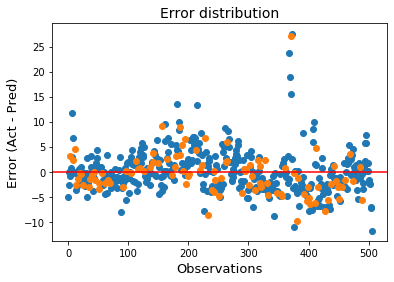

In [47]:
plt.scatter(y_train.index, errors_train)   # y_train.index & X_train.index is same
plt.scatter(y_test.index, errors_test)
plt.xlabel("Observations", fontsize = 13)
plt.ylabel("Error (Act - Pred)",  fontsize = 13)
plt.title("Error distribution",  fontsize = 14)
plt.axhline(0, color = "red")
plt.show()

<html>
<body>
<u><h1 style="text-align:center; color:Red; font-size:30px;">Model 7: Polynomial Regression Manually
</h1></u>
</body>
</html>

In [48]:
# Degree 2 means - square 

data_1["LSTAT sq"] = data_1["lstat"]**2
data_1["RM sq"] = data_1["rm"]**2
data_1["rm lstat"] = data_1["lstat"]*data_1["rm"]

In [49]:
X = data_1[["lstat", "rm", "rm lstat", "LSTAT sq", "RM sq",]]   # Input data  (Hiring is not useful for predicting)
y = data_1[["medv"]]             # Output data

# Split the data for train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y , train_size = 0.8, random_state = 21)   # 70-30 Split

X_train_1 = sm.add_constant(X_train)    # Adds Intercept 

lm = sm.OLS(y_train, X_train_1)       # Creates function
lm = lm.fit()                      # Get best fit line output

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     274.1
Date:                Thu, 06 May 2021   Prob (F-statistic):          1.90e-126
Time:                        11:54:34   Log-Likelihood:                -1162.1
No. Observations:                 404   AIC:                             2336.
Df Residuals:                     398   BIC:                             2360.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         86.9397     15.686      5.543      0.000      56.103     117.776
lstat         -0.1261      0.532     -0.237      0.813      -1.172       0.919
rm           -22.9677      4.290     -5.354      0.000     -31.402     -14.534
rm lstat      -0.1510      0.066     -2.274      0.024      -0.282      -0.020
LSTAT sq       0.0102      0.005      1.927      0.055      -0.000       0.021
RM sq          2.2774      0.300      7.587      0.000       1.687       2.868
==============================================================================
Omnibus:                      160.293   Durbin-Watson:                   2.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              977.175
Skew:                           1.571   Prob(JB):                    6.44e-213
Kurtosis:                       9.941   Cond. No.                     2.48e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
X_test_1 = sm.add_constant(X_test)  

all_error_metric(y_test, lm.predict(X_test_1))  # Test data

RMSE:  4.48
R sq:  0.79


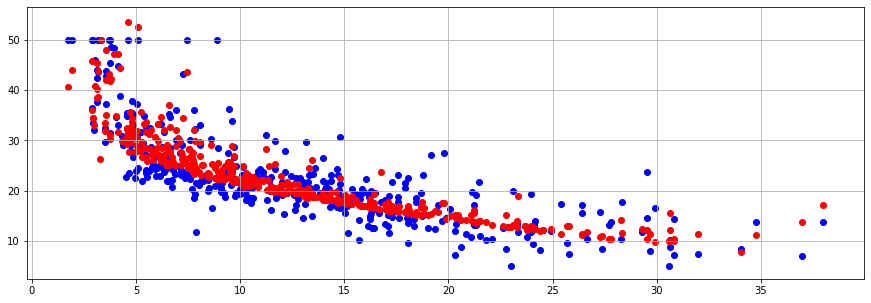

In [51]:
plt.figure(figsize = (15,5))
# beacuse it have only  Train data - Regression line (eq can also be used)
plt.scatter(X_train["lstat"], y_train,  color='blue')
plt.scatter(X_train["lstat"], lm.predict(X_train_1),  color='red')
plt.grid()
plt.show()

### <font color='green'> Concluding statement </font>
- Using Polynominal regression we achieved 77.5% on train dataset & 79% on test data.